## Overview
In this project, I'm going to analyze transactional data that has been gathered over 4 years. The main goal of this analysis is to create visual representations of the data to assess the performance over these years. The primary interest of the stakeholders is in analyzing the profit. Specifically, the focus will be on the analysis of products, customer locations (countries), and time trends to identify any patterns or trends.

## Data Gathering
The data is stored in an Excel file, so I downloaded it and imported it into my analysis file. The file contains six sheets: `DimCustomer`, `DimDate`, `DimGeography`, `DimProduct`, `DimSalesTerritory`, and `FactInternetSales`.

## Data Assessing & Cleaning  
##### Using **Power Query**

### `FactInternetSales` Table
- We do not need all the columns in the `FactInternetSales` table for our analysis. Therefore, we will retain only the following necessary columns:  
  - `ProductKey`, `OrderDateKey`, `DueDateKey`, `ShipDateKey`, `CustomerKey`, `SalesTerritoryKey`, `OrderQuantity`, `UnitPrice`, and `ProductStandardCost`.

- We calculated the revenue:  
  - A custom column named `Total Revenue` was created using the following formula:  
    ```powerquery
    = Table.AddColumn(#"Changed Type1", "Total Revenue", each [OrderQuantity] * [UnitPrice])
    ```

- We calculated the Cost of Goods Sold (COGs):  
  - A new column named `COGs` was created using the following formula:  
    ```powerquery
    = Table.AddColumn(#"Changed Type2", "COGs", each [OrderQuantity] * [ProductStandardCost])
    ```

- We calculated the total profit:  
  - A new column named `Total Profit` was created using the following formula:  
    ```powerquery
    = Table.AddColumn(#"Changed Type3", "Total Profit", each [Total Revenue] - [COGs])
    ```

---

### `DimSalesTerritory` Table
- Removed the row where `SalesTerritoryKey` equals 11 because it has no value.
- Removed the `SalesTerritoryImage` column because it contains only null values.

---

### `DimProduct` Table
- Selected only the following columns for use in our analysis:  
  - `ProductKey`, `EnglishProductName`, and `Color`.
- Replaced `NA` values in the `Color` column with `Unspecified`.

---

### `DimGeography` Table
- Selected only the following columns for use in our analysis:  
  - `GeographyKey`, `City`, `EnglishCountryRegionName`, and `SalesTerritoryKey`.

---

### `DimDate` Table
- Since we are rebuilding this table from scratch, we deleted all columns except `FullDateAlternateKey`.
- Created a new column for `Year` and filtered it to include only the years 2005 to 2008, as these are the years present in the dataset.
- Created new columns for:
  - Month number (`MonthNumber`).
  - Month name (`MonthName`) shortened to three characters (e.g., "Jan", "Feb").
- Created a day name column (`DayName`).
- Created a new column called `WeekType` that categorizes days as either "Weekend" or "Weekday".
- Created a new column for year quarters (`Quarter`) and added a `Q` prefix to each value (e.g., "Q1", "Q2").

---

### `DimCustomer` Table
- Created a new column called `Full Name` by merging the `FirstName` and `LastName` columns.
- Selected the following columns for analysis:  
  - `CustomerKey`, `GeographyKey`, `CustomerAlternateKey`, `Full Name`, `BirthDate`, and `Gender`.

### Data Model
We created our data model using Power Pivot by establishing relationships between tables.

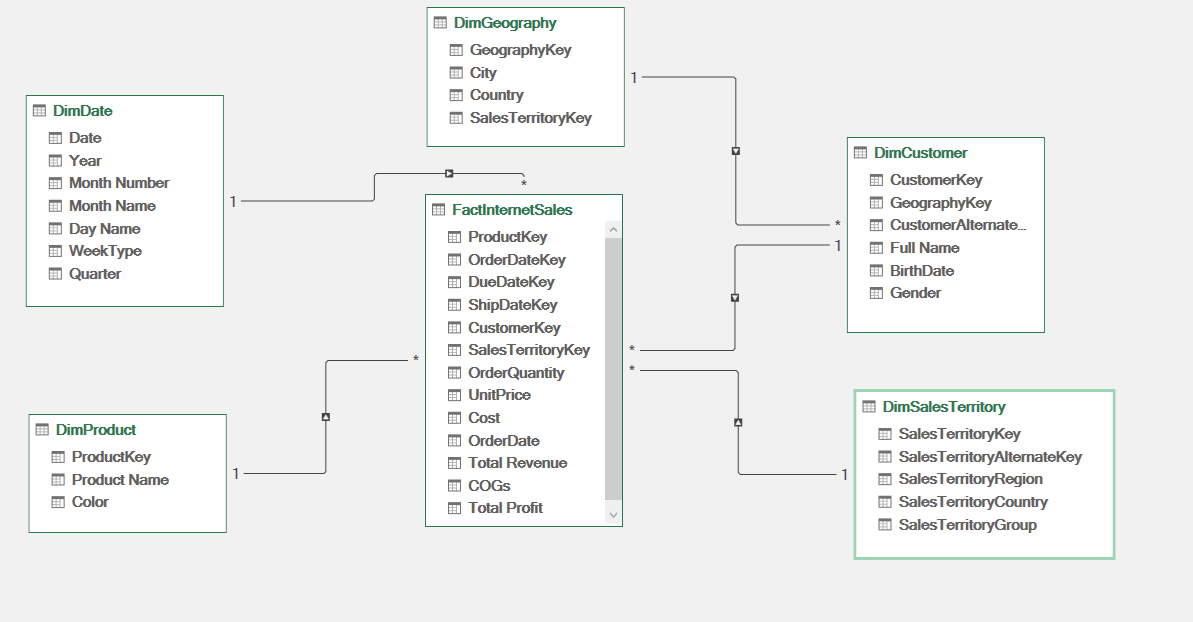

## Analysis Plan  
We will have two dashboards.  

The first dashboard will contain analysis for:  
1. **KPI Comparison to Previous Year**:  
    - COGs, Revenue, Quantity, Profit, Profit Margin, and Transactions compared to the previous year.  
2. **Yearly Performance Metrics (Above Average Years)**:  
    - Total Revenue, Profit, and Transactions for years exceeding the average performance.  
3. **Monthly Profit Trends**:  
    - Analyzing profit trends on a monthly basis.  
4. **Profit by Week Type**:  
    - Assessing profit based on different week types.  
5. **Quarterly Profit Analysis**:  
    - Evaluating profit performance on a quarterly basis.  
6. **Profit by Weekday**:  
    - Examining profit trends specific to weekdays.  

The second dashboard will contain analysis for:  
1. **Top 5 Profitable Products (% Contribution and Others)**: Identifies the five most profitable products and their contribution as a percentage of total profits, with insights into the rest.  
2. **Top 5 Profitable Customers (% Contribution and Others)**: Highlights the top five high-profit customers, their percentage share of overall profits, and details about other customers' contributions.  
3. **Profit by Gender**: Displays profit breakdown by gender, helping identify gender-based profit trends.  
4. **Profit by Product Color (Highlighting Best Sellers)**: Analyzes profits associated with product colors, highlighting the best-selling colors for optimization.  
5. **Profit by Pricing Types**: Examines profit variations based on pricing types, providing insights into pricing strategy effectiveness.  
6. **Country-Wise Profit (Custom Map)**: Utilizes a custom map to visualize profit distribution by country, aiding in geographic targeting.  
7. **Profit by Age Groups**: Segments profits into age groups to understand which age demographics contribute the most to profitability.  

- We created a new query called `All Measures` to include the measures we are going to calculate.  
- **Measures**:  
    1. **\# Transactions**  
          ```
          =COUNTROWS(FactInternetSales)  
          ```  
    2. **All Products**  
          ```
          =COUNTROWS(DimProduct)  
          ```  
    3. **Sold Products**  
          ```
          =DISTINCTCOUNT(FactInternetSales[ProductKey])  
          ```  
    4. **Unsold Products**  
          ```
          = [All Products] - [Sold Products]  
          ```  
    5. **% Profit Margin**  
          ```
          =DIVIDE([Sum of Total Profit], [Sum of Total Revenue])  
          ```  

Format our numbers using this formula:  
```
[<1000000]0.00," K";[<1000000000]0.00,," M";0.00,,, " B"  
```  


#### **Dashboard 1**
- We created a bar chart to display the total profit, total revenue, and total transactions for each year, and we added a button for each KPI to switch between them.  
- We computed the average for each KPI and highlighted the years where the total KPI value was above the average in this chart.  
- We also calculated the contribution percentage for the years that are above the average for each KPI.  
- We calculated the percentage increase or decrease between two years for our KPIs.  
- We created a line chart to show the total profit trends over the months.  
  - We used **Power Pivot** to sort the **Month Name** column by the **Month Number** column in the **DimDate** table.  
  - We calculated the contribution of the top three months to the total profit.  
- We created a line chart to show the total profit trends over the weekdays.  
  - We **highlighted** the top three days with the highest total profit.
- We created a donut chart to show the total profit per day type (weekday, weekend)
    - We calculated the make-up percentage per day type of the total profit
- We created four cards to show the total profit per year quarter.
- We created a filter to filter our analysis by country

#### **Dashboard 2**  

The top part of this chart is for product analysis:  
- We created a bar chart to show the top 5 products that contribute to the profit and their contribution percentage.  
- We created 3 cards to display the total available products, sold products, and unsold products.  
- We created a bar chart to show the total profit by product colors.  
- We used Power Query to create a column called `Product Price Type` that categorizes prices as `Less Expensive` (≤ \$150) or `Expensive` (> \$150).  
  - We created a bubble chart to show the total profit for each category and its contribution to profit.  

The bottom part of this chart is for customer analysis:  
- Similarly, we created a bar chart to show the top 5 customers that contribute to the profit and their contribution percentage.  
- We calculated a new measure for the number of unique customers:  
    ```DAX
    =DISTINCTCOUNT(FactInternetSales[CustomerKey])
    ```
- We created a new column for customer age and another column to categorize customers into age groups.  
- We calculated a new measure for the average customer age:  
    ```DAX
    =AVERAGE(DimCustomer[Customer Age])
    ```
- We created 2 cards to display the total number of unique customers and the average customer age.
- We created **two** cards to show the percentage contribution **to the profit** for each gender.  
- We created a column chart to show the total **profit** for each age group and the percentage contribution to the total profit for the age group that has the largest total profit.  
- We created a map to show the total profit for each country and the percentage contribution to the total profit for the two countries that **have** the largest total profit.  
